In [50]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import optimizers
import keras_cv
import numpy as np 
from keras_cv import bounding_box
import os
import resource
from keras_cv import visualization
import tqdm

In [51]:
pretrained_model = keras_cv.models.RetinaNet.from_preset(
        "retinanet_resnet50_pascalvoc" , bounding_box_format='xywh'
)

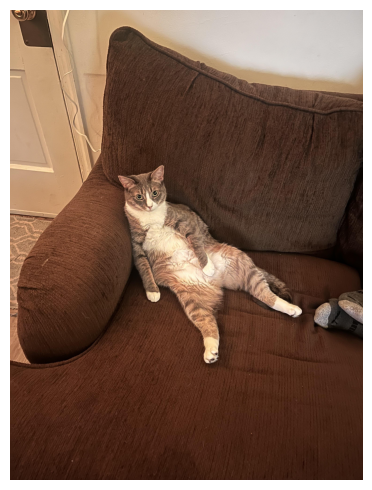

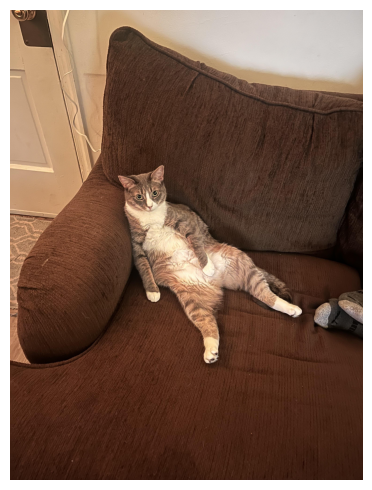

In [52]:
url = 'https://i.redd.it/twpfhcw58xgb1.jpg'
filepath = tf.keras.utils.get_file(origin=url)
image = keras.utils.load_img(filepath)
image = np.array(image)
h, w, c = image.shape
batch = image.reshape(1, h, w, c)

visualization.plot_image_gallery(
    batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)


In [53]:
inference_resizing = keras_cv.layers.Resizing(
        640, 640, pad_to_aspect_ratio=True, bounding_box_format="xywh"
)

In [54]:
image_batch = inference_resizing(batch)

In [55]:
label_names = [
    "Aeroplane",
    "Bicycle",
    "Bird",
    "Boat",
    "Bottle",
    "Bus",
    "Car",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Motorbike",
    "Person",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]
id2label = {k: v for k, v in enumerate(label_names)}


In [61]:
y_pred = pretrained_model.predict(image_batch)
# y_pred is a bounding box Tensor:
# {"classes": ..., "boxes": ...}
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=id2label,
)

2024-12-24 17:59:16.028700: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at xla_ops.cc:577 : INVALID_ARGUMENT: Detected unsupported operations when trying to compile graph __inference_one_step_on_data_68115[] on XLA_GPU_JIT: CombinedNonMaxSuppression (No registered 'CombinedNonMaxSuppression' OpKernel for XLA_GPU_JIT devices compatible with node {{node multi_class_non_max_suppression_4_1/combined_non_max_suppression/CombinedNonMaxSuppression}}){{node multi_class_non_max_suppression_4_1/combined_non_max_suppression/CombinedNonMaxSuppression}}
The op is created at: 
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/runpy.py", line 196, in _run_module_as_main
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/runpy.py", line 86, in _run_code
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/traitlets/config/application.p

InvalidArgumentError: Graph execution error:

Detected at node multi_class_non_max_suppression_4_1/combined_non_max_suppression/CombinedNonMaxSuppression defined at (most recent call last):
<stack traces unavailable>
Detected at node multi_class_non_max_suppression_4_1/combined_non_max_suppression/CombinedNonMaxSuppression defined at (most recent call last):
<stack traces unavailable>
Detected unsupported operations when trying to compile graph __inference_one_step_on_data_68115[] on XLA_GPU_JIT: CombinedNonMaxSuppression (No registered 'CombinedNonMaxSuppression' OpKernel for XLA_GPU_JIT devices compatible with node {{node multi_class_non_max_suppression_4_1/combined_non_max_suppression/CombinedNonMaxSuppression}}){{node multi_class_non_max_suppression_4_1/combined_non_max_suppression/CombinedNonMaxSuppression}}
The op is created at: 
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/runpy.py", line 196, in _run_module_as_main
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/runpy.py", line 86, in _run_code
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/asyncio/events.py", line 80, in _run
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
File "tmp/ipykernel_35720/4278518994.py", line 10, in <module>
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 559, in predict
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 256, in one_step_on_data_distributed
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 246, in one_step_on_data
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras_cv/src/models/object_detection/retinanet/retinanet.py", line 252, in predict_step
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras_cv/src/models/object_detection/retinanet/retinanet.py", line 311, in decode_predictions
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/layers/layer.py", line 899, in __call__
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/ops/operation.py", line 46, in __call__
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras_cv/src/layers/object_detection/multi_class_non_max_suppression.py", line 102, in call
	tf2xla conversion failed while converting __inference_one_step_on_data_68115[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_68718]

In [63]:
y_pred


{'boxes': array([[[-9.58801270e-01,  2.19985962e+01,  4.91623352e+02,
           5.59496704e+02],
         [-2.82028198e+00,  2.54723511e+01,  4.85252472e+02,
           5.51303528e+02],
         [ 6.28372192e-01,  2.12827148e+01,  4.95480591e+02,
           5.73419312e+02],
         [ 1.87005463e+01, -2.34120178e+00,  4.61855774e+02,
           5.15488464e+02],
         [-2.82550049e+00,  3.62061157e+01,  4.95668945e+02,
           5.50721985e+02],
         [ 1.38392639e+00,  2.14057312e+01,  4.98784058e+02,
           5.78738525e+02],
         [ 2.25465393e+00, -3.01498413e+00,  5.00601868e+02,
           5.95279663e+02],
         [ 4.97995605e+01, -2.95683289e+00,  4.29934326e+02,
           5.14910095e+02],
         [ 5.93871460e+01,  5.50147552e+01,  4.17872498e+02,
           4.88638977e+02],
         [-4.67315674e+00,  5.21493530e+00,  5.04516266e+02,
           5.92325073e+02],
         [ 1.61755371e+00,  2.12688293e+01,  4.98388550e+02,
           6.02285278e+02],
         [-1

In [58]:
url = 'https://archive.org/download/street_202308/street.jpeg'
filepath = tf.keras.utils.get_file(origin=url)
image = tf.keras.utils.load_img(filepath)
image = np.array(image)
h, w, c = image.shape
batch = image.reshape(1, h, w, c)
image_batch = inference_resizing(batch)

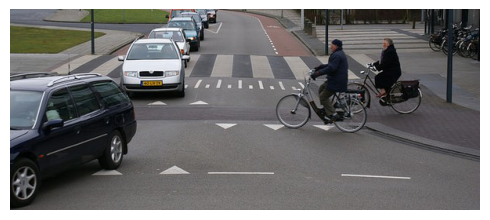

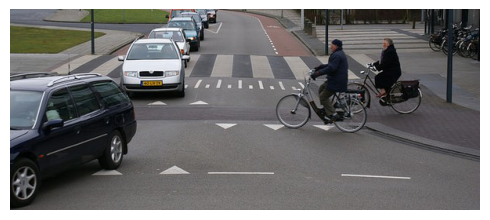

In [59]:
visualization.plot_image_gallery(
    batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)


In [60]:
prediction_decoder = keras_cv.layers.MultiClassNonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    iou_threshold=1.0,  # No suppression, keeps all boxes
    confidence_threshold=0.0,  # Include all predictions regardless of score
)

pretrained_model.prediction_decoder = prediction_decoder

y_pred = pretrained_model.predict(image_batch)

visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=id2label,
)


2024-12-24 17:58:21.600854: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at xla_ops.cc:577 : INVALID_ARGUMENT: Detected unsupported operations when trying to compile graph __inference_one_step_on_data_64653[] on XLA_GPU_JIT: CombinedNonMaxSuppression (No registered 'CombinedNonMaxSuppression' OpKernel for XLA_GPU_JIT devices compatible with node {{node multi_class_non_max_suppression_3_1/combined_non_max_suppression/CombinedNonMaxSuppression}}){{node multi_class_non_max_suppression_3_1/combined_non_max_suppression/CombinedNonMaxSuppression}}
The op is created at: 
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/runpy.py", line 196, in _run_module_as_main
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/runpy.py", line 86, in _run_code
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/traitlets/config/application.p

InvalidArgumentError: Graph execution error:

Detected at node multi_class_non_max_suppression_3_1/combined_non_max_suppression/CombinedNonMaxSuppression defined at (most recent call last):
<stack traces unavailable>
Detected at node multi_class_non_max_suppression_3_1/combined_non_max_suppression/CombinedNonMaxSuppression defined at (most recent call last):
<stack traces unavailable>
Detected unsupported operations when trying to compile graph __inference_one_step_on_data_64653[] on XLA_GPU_JIT: CombinedNonMaxSuppression (No registered 'CombinedNonMaxSuppression' OpKernel for XLA_GPU_JIT devices compatible with node {{node multi_class_non_max_suppression_3_1/combined_non_max_suppression/CombinedNonMaxSuppression}}){{node multi_class_non_max_suppression_3_1/combined_non_max_suppression/CombinedNonMaxSuppression}}
The op is created at: 
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/runpy.py", line 196, in _run_module_as_main
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/runpy.py", line 86, in _run_code
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/asyncio/events.py", line 80, in _run
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
File "tmp/ipykernel_35720/3498434814.py", line 10, in <module>
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 559, in predict
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 256, in one_step_on_data_distributed
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 246, in one_step_on_data
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras_cv/src/models/object_detection/retinanet/retinanet.py", line 252, in predict_step
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras_cv/src/models/object_detection/retinanet/retinanet.py", line 311, in decode_predictions
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/layers/layer.py", line 899, in __call__
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/ops/operation.py", line 46, in __call__
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras_cv/src/layers/object_detection/multi_class_non_max_suppression.py", line 102, in call
	tf2xla conversion failed while converting __inference_one_step_on_data_64653[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_65256]

In [48]:
prediction_decoder = keras_cv.layers.MultiClassNonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    iou_threshold=0.2,  # IoU threshold for pruning
    confidence_threshold=0.7,  # Confidence threshold for predictions
)

pretrained_model.prediction_decoder = prediction_decoder

y_pred = pretrained_model.predict(image_batch)

visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=id2label,
)


2024-12-24 17:56:56.633226: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at xla_ops.cc:577 : INVALID_ARGUMENT: Detected unsupported operations when trying to compile graph __inference_one_step_on_data_51998[] on XLA_GPU_JIT: CombinedNonMaxSuppression (No registered 'CombinedNonMaxSuppression' OpKernel for XLA_GPU_JIT devices compatible with node {{node multi_class_non_max_suppression_2_1/combined_non_max_suppression/CombinedNonMaxSuppression}}){{node multi_class_non_max_suppression_2_1/combined_non_max_suppression/CombinedNonMaxSuppression}}
The op is created at: 
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/runpy.py", line 196, in _run_module_as_main
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/runpy.py", line 86, in _run_code
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/traitlets/config/application.p

InvalidArgumentError: Graph execution error:

Detected at node multi_class_non_max_suppression_2_1/combined_non_max_suppression/CombinedNonMaxSuppression defined at (most recent call last):
<stack traces unavailable>
Detected at node multi_class_non_max_suppression_2_1/combined_non_max_suppression/CombinedNonMaxSuppression defined at (most recent call last):
<stack traces unavailable>
Detected unsupported operations when trying to compile graph __inference_one_step_on_data_51998[] on XLA_GPU_JIT: CombinedNonMaxSuppression (No registered 'CombinedNonMaxSuppression' OpKernel for XLA_GPU_JIT devices compatible with node {{node multi_class_non_max_suppression_2_1/combined_non_max_suppression/CombinedNonMaxSuppression}}){{node multi_class_non_max_suppression_2_1/combined_non_max_suppression/CombinedNonMaxSuppression}}
The op is created at: 
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/runpy.py", line 196, in _run_module_as_main
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/runpy.py", line 86, in _run_code
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/asyncio/events.py", line 80, in _run
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
File "tmp/ipykernel_35720/3607986441.py", line 10, in <module>
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 559, in predict
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 256, in one_step_on_data_distributed
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 246, in one_step_on_data
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras_cv/src/models/object_detection/retinanet/retinanet.py", line 252, in predict_step
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras_cv/src/models/object_detection/retinanet/retinanet.py", line 311, in decode_predictions
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/layers/layer.py", line 899, in __call__
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/ops/operation.py", line 46, in __call__
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "home/farrukhy/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras_cv/src/layers/object_detection/multi_class_non_max_suppression.py", line 102, in call
	tf2xla conversion failed while converting __inference_one_step_on_data_51998[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_52601]